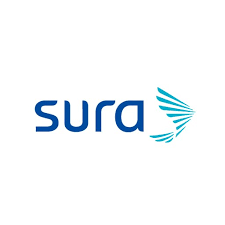

$ \ $

## ***Nombre: Julián Uribe Castañeda***

## ***Prueba Técnica: Analista SARLAFT***

$ \ $

----

# ***Paquetes para trabajar***

$ \ $

Los siguientes son algunos paquetes para trabajar con bases de datos y demás.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

In [ ]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

-----

## ***Transactions $(transacciones)$***

$ \ $

Mostramos el conjunto de datos que describen las transacciones  ("transactions").

In [ ]:
url = '/content/transactions.csv'
data_1 = pd.read_csv(url, sep = ',')
data_1

,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP,IS_FRAUD,ALERT_ID
0,1,6456,9069,TRANSFER,465.05,0,False,-1
1,2,7516,9543,TRANSFER,564.64,0,False,-1
2,3,2445,9356,TRANSFER,598.94,0,False,-1
3,4,2576,4617,TRANSFER,466.07,0,False,-1
4,5,3524,1773,TRANSFER,405.63,0,False,-1
...,...,...,...,...,...,...,...,...
1323229,1323230,3733,8051,TRANSFER,112.98,199,False,-1
1323230,1323231,2536,8732,TRANSFER,459.64,199,False,-1
1323231,1323232,1466,8586,TRANSFER,468.60,199,False,-1
1323232,1323233,1451,3849,TRANSFER,562.36,199,False,-1


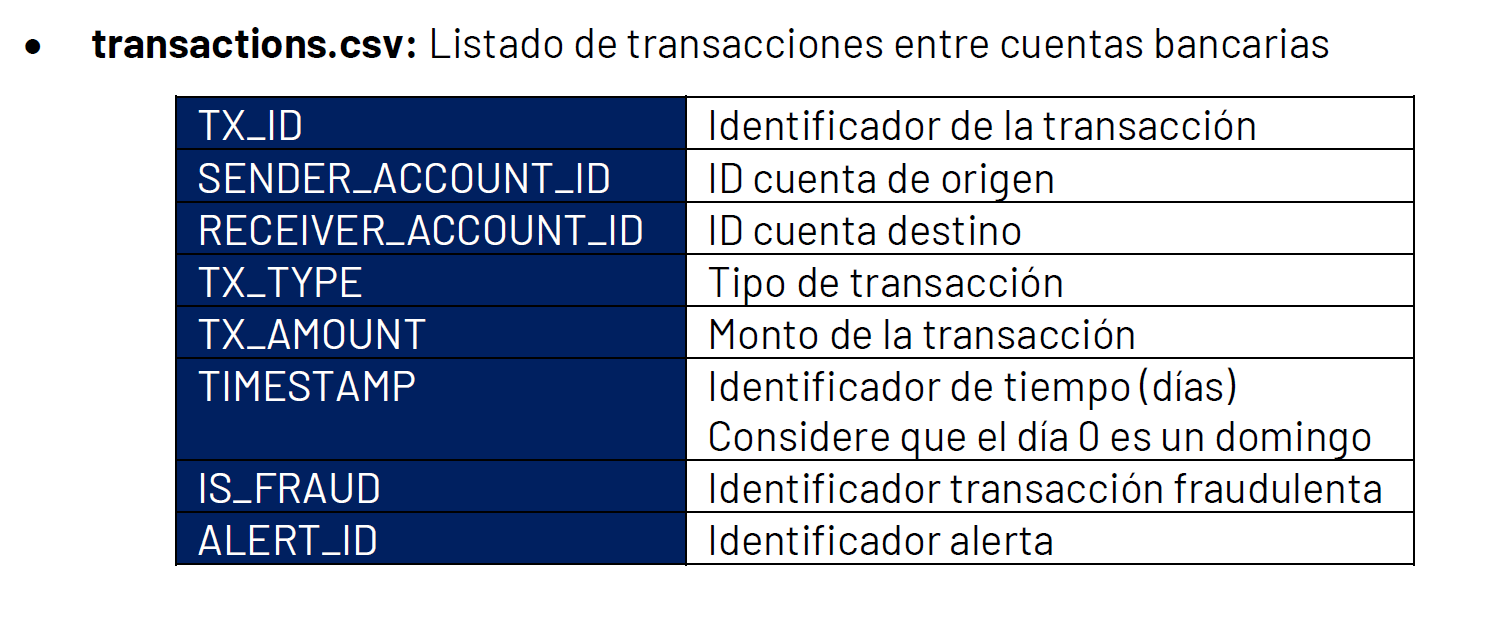

$ \ $

($\checkmark$) Verificamos si las columnas tienen valores vacios o de tipo Nan y al parecer no hay.

In [ ]:
nan_count = data_1.isnull().sum()
empty_count = (data_1 == '').sum()

for column in data_1.columns:
    nan_values = nan_count[column]
    empty_values = empty_count[column]
    print(f"Column '{column}': NaN values = {nan_values}, Empty values = {empty_values}", "\n")

Column 'TX_ID': NaN values = 0, Empty values = 0 

Column 'SENDER_ACCOUNT_ID': NaN values = 0, Empty values = 0 

Column 'RECEIVER_ACCOUNT_ID': NaN values = 0, Empty values = 0 

Column 'TX_TYPE': NaN values = 0, Empty values = 0 

Column 'TX_AMOUNT': NaN values = 0, Empty values = 0 

Column 'TIMESTAMP': NaN values = 0, Empty values = 0 

Column 'IS_FRAUD': NaN values = 0, Empty values = 0 

Column 'ALERT_ID': NaN values = 0, Empty values = 0 



$ \ $

$(\checkmark)$ Describimos el tipo de datos de las transferencias ("transfers").

In [ ]:
data_1.dtypes

TX_ID                    int64
SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
TX_TYPE                 object
TX_AMOUNT              float64
TIMESTAMP                int64
IS_FRAUD                  bool
ALERT_ID                 int64
dtype: object

$ \ $

-----

## ***Accounts $(cuentas)$***

$ \ $

($\checkmark$) Mostramos el conjunto de datos que describen las cuentas ("accounts").

In [ ]:
url = '/content/accounts.csv'
data_2 = pd.read_csv(url, sep = ';')
data_2

,ACCOUNT_ID,CUSTOMER_ID,INIT_BALANCE,COUNTRY,ACCOUNT_TYPE,TX_BEHAVIOR_ID
0,0,C_0,184.44,US,I,1
1,1,C_1,175.80,US,I,1
2,2,C_2,142.06,US,I,1
3,3,C_3,125.89,US,I,1
4,4,C_4,151.13,US,I,1
...,...,...,...,...,...,...
9995,9995,C_9995,394.35,US,I,5
9996,9996,C_9996,344.98,US,I,5
9997,9997,C_9997,260.85,US,I,5
9998,9998,C_9998,323.79,US,I,5


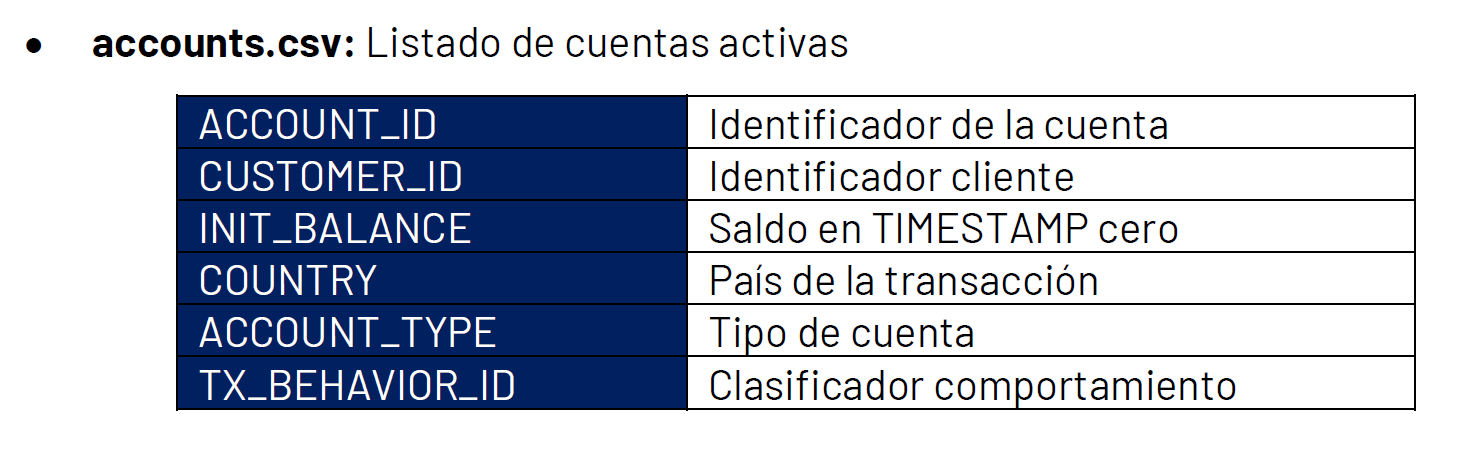

$ \ $

($\checkmark$) Verificamos si las columnas tienen valores vacios o de tipo Nan y al parecer no hay.

In [ ]:
nan_count = data_2.isnull().sum()
empty_count = (data_2 == '').sum()

for column in data_2.columns:
    nan_values = nan_count[column]
    empty_values = empty_count[column]
    print(f"Column '{column}': NaN values = {nan_values}, Empty values = {empty_values}", "\n")

Column 'ACCOUNT_ID': NaN values = 0, Empty values = 0 

Column 'CUSTOMER_ID': NaN values = 0, Empty values = 0 

Column 'INIT_BALANCE': NaN values = 0, Empty values = 0 

Column 'COUNTRY': NaN values = 0, Empty values = 0 

Column 'ACCOUNT_TYPE': NaN values = 0, Empty values = 0 

Column 'TX_BEHAVIOR_ID': NaN values = 0, Empty values = 0 



$ \ $

$(\checkmark)$ Describimos el tipo de datos de las cuentas ("accounts").

In [ ]:
data_2.dtypes

ACCOUNT_ID          int64
CUSTOMER_ID        object
INIT_BALANCE      float64
COUNTRY            object
ACCOUNT_TYPE       object
TX_BEHAVIOR_ID      int64
dtype: object

$ \ $

-----

## ***Alerts $(alertas)$***

$ \ $

Mostramos el conjunto de datos que describen las transacciones ("alerts").

In [ ]:
url = '/content/alerts.csv'
data_3 = pd.read_csv(url, sep = ',')
data_3

,ALERT_ID,ALERT_TYPE,IS_FRAUD,TX_ID,SENDER_ACCOUNT_ID,RECEIVER_ACCOUNT_ID,TX_TYPE,TX_AMOUNT,TIMESTAMP
0,193,fan_in,True,82,6976,9739,TRANSFER,4.85,0
1,377,cycle,True,949,5776,2570,TRANSFER,10.27,0
2,189,fan_in,True,6280,9999,9530,TRANSFER,2.74,1
3,377,cycle,True,7999,1089,7352,TRANSFER,10.27,1
4,130,fan_in,True,12975,7025,9708,TRANSFER,3.53,2
...,...,...,...,...,...,...,...,...,...
1714,272,cycle,True,1316271,2465,707,TRANSFER,16.31,198
1715,44,fan_in,True,1316636,1453,8709,TRANSFER,2.81,199
1716,222,cycle,True,1317852,9446,790,TRANSFER,11.64,199
1717,74,fan_in,True,1322020,6969,9529,TRANSFER,3.86,199


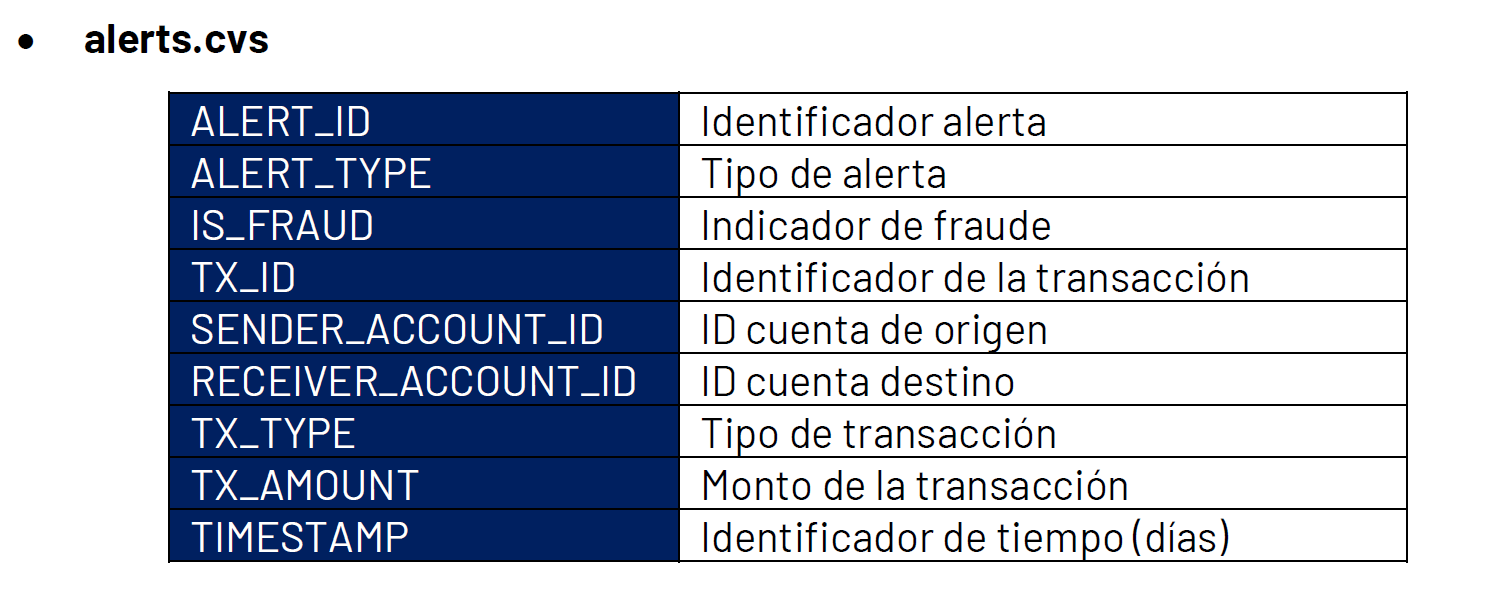

$ \ $

($\checkmark$) Verificamos si las columnas tienen valores vacios o de tipo Nan y al parecer no hay.

In [ ]:
nan_count = data_3.isnull().sum()
empty_count = (data_3 == '').sum()

for column in data_3.columns:
    nan_values = nan_count[column]
    empty_values = empty_count[column]
    print(f"Column '{column}': NaN values = {nan_values}, Empty values = {empty_values}", "\n")

Column 'ALERT_ID': NaN values = 0, Empty values = 0 

Column 'ALERT_TYPE': NaN values = 0, Empty values = 0 

Column 'IS_FRAUD': NaN values = 0, Empty values = 0 

Column 'TX_ID': NaN values = 0, Empty values = 0 

Column 'SENDER_ACCOUNT_ID': NaN values = 0, Empty values = 0 

Column 'RECEIVER_ACCOUNT_ID': NaN values = 0, Empty values = 0 

Column 'TX_TYPE': NaN values = 0, Empty values = 0 

Column 'TX_AMOUNT': NaN values = 0, Empty values = 0 

Column 'TIMESTAMP': NaN values = 0, Empty values = 0 



$ \ $

$(\checkmark)$ Describimos el tipo de datos de las transferencias ("transfers").

In [ ]:
data_3.dtypes

ALERT_ID                 int64
ALERT_TYPE              object
IS_FRAUD                  bool
TX_ID                    int64
SENDER_ACCOUNT_ID        int64
RECEIVER_ACCOUNT_ID      int64
TX_TYPE                 object
TX_AMOUNT              float64
TIMESTAMP                int64
dtype: object

$ \ $

-----

# ***Preguntas (prueba tecnica).***

$ \ $

($\checkmark$) ¿Cuántas cuentas bancarias se presentan?

Aparentemente, tenemos 10.000 cuentas bancarias.

In [ ]:
len(set(data_2["ACCOUNT_ID"].values))

10000

$ \ $

($\checkmark$) ¿Cuántos clientes se presentan?

Aparentemente, tenemos 10.000 clientes.

In [ ]:
len(set(data_2["CUSTOMER_ID"].values))

10000

$ \ $

($\checkmark$)  ¿Hay clientes con más de una cuenta bancaria?

Esto no es posible, ya que tenemos 10.000 clientes, 10.000 cuentas bancarias y no hay valores vacios o de tipo Nan. Y por el principio del palomar, no es posible que hayan clientes con mas de una cuenta.


$ \ $

($\checkmark$)  ¿Cómo es la distribución de los montos iniciales en las cuentas?

A continuacion mostramos como es la distribucion de las cuentas.

In [ ]:
# En esta parte mostramos los montos iniciales y cuantas veces se repiten.
data_1["TX_AMOUNT"].value_counts()

21474836.47    3053
165.66         1780
7.91           1625
195.19         1540
8.23           1499
               ... 
156036.76         1
76612.53          1
135597.09         1
271874.31         1
18850232.00       1
Name: TX_AMOUNT, Length: 43748, dtype: int64

In [ ]:
# Aqui mostramos las distribuciones estadisticas de los montos iniciales.
data_1["TX_AMOUNT"].describe()

count    1.323234e+06
mean     1.159882e+05
std      1.320091e+06
min      0.000000e+00
25%      2.393000e+01
50%      1.567100e+02
75%      4.400000e+02
max      2.147484e+07
Name: TX_AMOUNT, dtype: float64

$ \ $

($\checkmark$)  ¿Cuántos tipos de cuenta hay?

Segun el analisis de la variables, tenemos que el numero de cuentas es 9999.

In [ ]:
len(set(data_1["SENDER_ACCOUNT_ID"]))

9999

$ \ $

($\checkmark$)  ¿Existe alguna relación entre el saldo inicial de la cuenta y la marcación de comportamiento de la cuenta?

La siguiente tabla nos muestra que si, y la relacion es la siguiente:

* Si el saldo inicial se encuentra en el intervalo $[100,200]$, entonces el clasificador de comportamiento solo toma los valores 1 y 4.

* Si el saldo inicial se encuentra en el intervalo $[200,400]$, entonces el clasificador de comportamiento solo toma los valores 2 y 5.

* Si el saldo inicial se encuentra en el intervalo $[400,600]$, entonces el clasificador de comportamiento solo toma el valor de 3.

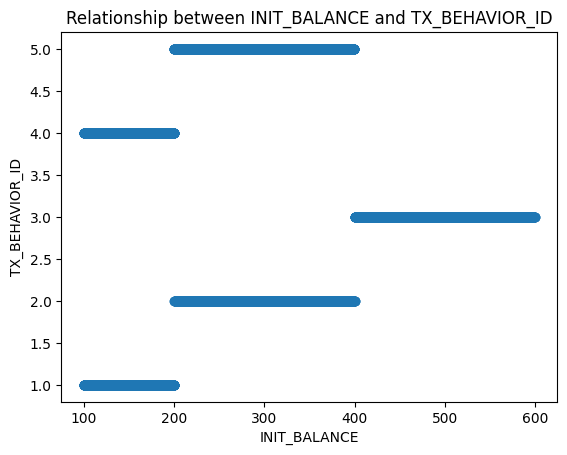

In [ ]:
plt.scatter(data_2['INIT_BALANCE'], data_2['TX_BEHAVIOR_ID'])
plt.xlabel('INIT_BALANCE')
plt.ylabel('TX_BEHAVIOR_ID')
plt.title('Relationship between INIT_BALANCE and TX_BEHAVIOR_ID')
plt.show()

$ \ $

($\checkmark$)  Distribución de montos de las transacciones.

La distribucion de los montos se hizo de la siguiente manera:

In [ ]:
# En este codigo mostramos cuantas veces cada monto de la transaccion fue repetido.
data_1["TX_AMOUNT"].value_counts()

21474836.47    3053
165.66         1780
7.91           1625
195.19         1540
8.23           1499
               ... 
156036.76         1
76612.53          1
135597.09         1
271874.31         1
18850232.00       1
Name: TX_AMOUNT, Length: 43748, dtype: int64

In [ ]:
# aqui mostramos la distribucion estadistica de los montos anteriores.
data_1["TX_AMOUNT"].describe()

count    1.323234e+06
mean     1.159882e+05
std      1.320091e+06
min      0.000000e+00
25%      2.393000e+01
50%      1.567100e+02
75%      4.400000e+02
max      2.147484e+07
Name: TX_AMOUNT, dtype: float64

$ \ $

($\checkmark$)  ¿Qué porcentaje de las transacciones fueron marcadas como fraudulentas?

Segun el siguiente codigo, tenemos que:

* El $99,87\%$  de las transacciones fueron marcadas como no fraudulentas.

* El $0.13\%$  de las transacciones fueron marcadas como  fraudulentas.

In [ ]:
data_1["IS_FRAUD"].value_counts(normalize=True)

False    0.998701
True     0.001299
Name: IS_FRAUD, dtype: float64

In [ ]:
data_1["IS_FRAUD"].value_counts()

False    1321515
True        1719
Name: IS_FRAUD, dtype: int64

$ \ $

($\checkmark$)  ¿Qué se puede decir sobre los montos de las transacciones que fueron marcadas como fraudulentas?

Se pueden decir varias cosas respecto al codigo mostrado en la parte de abajo:

* Solo hubo 1719 fraudes y 1321515 no fueron fraude.

* El valor promedio de cada fraude fue de 9.76 dolares.

* El valor maximo del fraude fue de 19.92 dolares y el valor minimo fue de 2.54 dolares.

Se puede decir mas, pero creo que esto es suficiente.

In [ ]:
# En esta parte describimos las estadisticas basicas de los montos de las transacciones que no fueron fraudulentas
mascara = data_1["IS_FRAUD"] == True
data_1[mascara]["TX_AMOUNT"].describe()

count    1719.000000
mean        9.763310
std         5.928078
min         2.540000
25%         3.780000
50%        10.600000
75%        15.300000
max        19.920000
Name: TX_AMOUNT, dtype: float64

In [ ]:
# En esta parte describimos las estadisticas basicas de los montos de las transacciones que  fueron fraudulentas
mascara = data_1["IS_FRAUD"] == False
data_1[mascara]["TX_AMOUNT"].describe()

count    1.321515e+06
mean     1.161390e+05
std      1.320942e+06
min      0.000000e+00
25%      2.429000e+01
50%      1.569700e+02
75%      4.400500e+02
max      2.147484e+07
Name: TX_AMOUNT, dtype: float64

$ \ $

($\checkmark$)  ¿Qué porcentaje de operaciones fraudulentas corresponde a cada tipo (ALERT_TYPE)?

Segun el siguiente codigo, tenemos que el resultado es:

* cycle:  $54.45 \%$

* fan_in:  $45.55\%$



In [ ]:
data_3["IS_FRAUD"].value_counts()

True    1719
Name: IS_FRAUD, dtype: int64

In [ ]:
data_3["ALERT_TYPE"].value_counts()

cycle     936
fan_in    783
Name: ALERT_TYPE, dtype: int64

In [ ]:
fraude = data_3["ALERT_TYPE"].value_counts(normalize = True)
fraude

cycle     0.544503
fan_in    0.455497
Name: ALERT_TYPE, dtype: float64

$ \ $

($\checkmark$)  Determina una hipótesis sobre el significado de cada uno de los ALERT_TYPE. Una forma de aproximarse a esta pregunta es analizando ejemplos de cada tipo de alerta.

Aparentemente, el significado del tipo de alerta esta muy relacionado con la monto en la transaccion. Para ser mas especifico, podriamos decir que:

* Si el monto en la transaccion se encuentra entre $2.5$ y $5$, entonces el tipo de alerta es ***fan_in***.

* Si el monto en la transaccion se encuentra entre $10$ y $20$, entonces el tipo de alerta es ***cycle***.

In [ ]:
data_3[["ALERT_TYPE", "TX_AMOUNT"]]

,ALERT_TYPE,TX_AMOUNT
0,fan_in,4.85
1,cycle,10.27
2,fan_in,2.74
3,cycle,10.27
4,fan_in,3.53
...,...,...
1714,cycle,16.31
1715,fan_in,2.81
1716,cycle,11.64
1717,fan_in,3.86


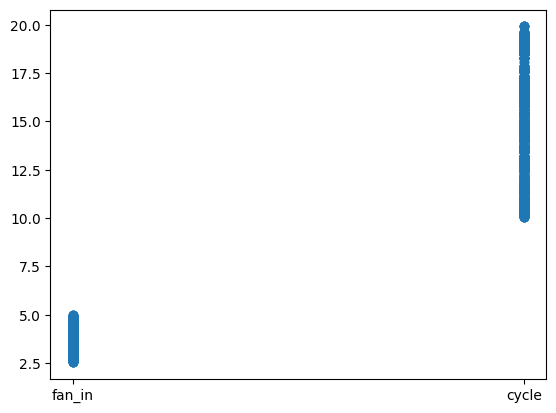

In [ ]:
plt.scatter(data_3["ALERT_TYPE"], data_3["TX_AMOUNT"]);

$ \ $

-----

# ***Ingenieria de variables.***

$ \ $

En este punto de la prueba se espera que a partir del entendimiento logrado en el punto anterior, diseñe diferentes variables explicativas de los casos de fraude. Por ejemplo, día de la semana en que se realizó la transacción, frecuencia de transacciones entre la cuenta origen y
cuenta destino.


>  Proponga e implemente por lo menos cinco posibles variables explicativas.

$ \ $

$\underline{\text{Solución:}}$

$ \ $

Para empezar, vamos a notar una serie de observaciones para al final obtener un conjunto de variables explicativas:

$ \ $

$(a)$ Todos los datos son de Estados Unidos.

In [ ]:
data_2['COUNTRY'].value_counts()

US    10000
Name: COUNTRY, dtype: int64

$ \ $

$(b)$ Todos los tipos de cuenta son iguales. Por este motivo, no consideraremos la variable ***'ACCOUNT_TYPE'*** como variable explicativa.

In [ ]:
data_2['ACCOUNT_TYPE'].value_counts()

I    10000
Name: ACCOUNT_TYPE, dtype: int64

$ \ $

$(c)$ Todos los tipos de transferencia son iguales.  Por este motivo, no consideraremos la variable 'TX_TYPE' como variable explicativa.

In [ ]:
data_1[['TX_TYPE']].value_counts()

TX_TYPE 
TRANSFER    1323234
dtype: int64

$ \ $

$(d)$ Por si es necesario, transformamos la data ***data_1['IS_FRAUD']*** en data numerica.


In [ ]:
le = LabelEncoder()
data_1['IS_FRAUD'] = le.fit_transform(data_1['IS_FRAUD'])

$ \ $

$(e)$ Los rasgos ***'ALERT_ID'*** y ***'IS_FRAUD'*** estan intimamente relacionados. Por este motivo, como consideramos estas variables linealmente dependientes, entonces no vamos a considerar a la variable ***'ALERT_ID'*** como variable explicativa, ya que conocemos lo suficiente de esta variable, entonces seria facil notar cuando una transaccion es un fraude y cuando no.

In [ ]:
data_1['ALERT_ID'].value_counts().sort_values(ascending = False)

-1      1321515
 313          5
 268          5
 369          5
 256          5
         ...   
 144          2
 294          2
 231          1
 272          1
 44           1
Name: ALERT_ID, Length: 392, dtype: int64

In [ ]:
# estudiamos los valores de "ALERT_ID" y aparentemente cuando nos arroja el valor de -1 no hay fraude
no_fraude = data_1["IS_FRAUD"] == 0
data_1[no_fraude]["ALERT_ID"].value_counts()

-1    1321515
Name: ALERT_ID, dtype: int64

In [ ]:
# estudiamos los valores de "ALERT_ID" y aparentemente cuando nos arroja un valor distinto a -1 hay fraude
fraude = data_1["IS_FRAUD"]== 1
data_1[fraude]["ALERT_ID"].value_counts()

270    5
306    5
278    5
305    5
399    5
      ..
144    2
294    2
231    1
272    1
44     1
Name: ALERT_ID, Length: 391, dtype: int64

$ \ $

$(f)$ Del anterior analisis, infiero que los rasgos

* ***'SENDER_ACCOUNT_ID'***,

* ***'TX_AMOUNT'***,

*	***'TIMESTAMP'***

son variables explicativas que describen el dataframe de tranferencias para detectar si hay fraude o no.

In [ ]:
transferencias = data_1[['SENDER_ACCOUNT_ID', 'TX_AMOUNT',	'TIMESTAMP', 'IS_FRAUD']]
transferencias

,SENDER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD
0,6456,465.05,0,0
1,7516,564.64,0,0
2,2445,598.94,0,0
3,2576,466.07,0,0
4,3524,405.63,0,0
...,...,...,...,...
1323229,3733,112.98,199,0
1323230,2536,459.64,199,0
1323231,1466,468.60,199,0
1323232,1451,562.36,199,0


$ \ $

$(g)$ Es natural preguntarse que variable se podria proponer para ser una variable predictora, que sirva para predecir si hay fraude o no. En este caso, voy a considerar el promedio, ya que una persona normalmente tiene habitos que pueden tener una cierta tendencia y esa tendencia la podriamos pensar como el promedio o la media.

In [ ]:
new_column_names = {"TX_AMOUNT" : "TX_AMOUNT_MEAN",	"TIMESTAMP" : "TIMESTAMP_MEAN"}
new_data = transferencias[['SENDER_ACCOUNT_ID', "TX_AMOUNT", "TIMESTAMP"]].groupby(['SENDER_ACCOUNT_ID']).mean().rename(columns = new_column_names)
new_data

,TX_AMOUNT_MEAN,TIMESTAMP_MEAN
SENDER_ACCOUNT_ID,,
1,175.800000,120.250000
2,142.050000,128.888889
3,125.880000,124.526316
4,151.130000,108.347826
5,70.240000,86.052632
...,...,...
9995,392.488238,87.114286
9996,341.694257,114.158416
9997,256.632350,86.557377


$ \ $

$(h)$ Ahora, actualizaremos nuestro dataframe ***transferencias*** con dos nuevas columnas que describen el promedio de los datos anteriores.

In [ ]:
TX_AMOUNT_MEAN = {}
TIMESTAMP_MEAN = {}

for i in range(transferencias.shape[0]):
  x = transferencias.loc[i, "SENDER_ACCOUNT_ID"]
  TX_AMOUNT_MEAN[i] = new_data.loc[x, "TX_AMOUNT_MEAN"]
  TIMESTAMP_MEAN[i] = new_data.loc[x, "TIMESTAMP_MEAN"]

transferencias["TX_AMOUNT_MEAN"] = TX_AMOUNT_MEAN
transferencias["TIMESTAMP_MEAN"] = TIMESTAMP_MEAN

<ipython-input-38-48a4d85d4a7b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transferencias["TX_AMOUNT_MEAN"] = TX_AMOUNT_MEAN
<ipython-input-38-48a4d85d4a7b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transferencias["TIMESTAMP_MEAN"] = TIMESTAMP_MEAN


In [ ]:
transferencias

,SENDER_ACCOUNT_ID,TX_AMOUNT,TIMESTAMP,IS_FRAUD,TX_AMOUNT_MEAN,TIMESTAMP_MEAN
0,6456,465.05,0,0,465.050000,99.444444
1,7516,564.64,0,0,564.640000,99.333333
2,2445,598.94,0,0,598.940000,99.111111
3,2576,466.07,0,0,466.070000,99.222222
4,3524,405.63,0,0,405.630000,99.444444
...,...,...,...,...,...,...
1323229,3733,112.98,199,0,112.980000,104.000000
1323230,2536,459.64,199,0,457.119061,98.790055
1323231,1466,468.60,199,0,468.600000,100.893258
1323232,1451,562.36,199,0,562.360000,100.446927


$ \ $

## ***Conclusión***

Las variables explicativas que hacen posible una deteccion de un posible fraude son:

* ***SENDER_ACCOUNT_ID***

* ***TX_AMOUNT***

* ***TIMESTAMP***

* ***IS_FRAUD***

* ***TX_AMOUNT_MEAN***

*	***TIMESTAMP_MEAN***

$ \ $

----

## ***Entrenamiento de modelo de detección de fraude***

$ \ $

Teniendo en cuenta los procedimientos anteriores, entrene un modelo supervisado para la
detección de transacciones fraudulentas. Por ejemplo, un modelo de clasificación.


$ \ $

$\underline{\text{Solución:}}$

$ \ $

$(1)$ Separamos nuestro conjunto de datos, teniendo en cuenta que:

$ \ $

> $(a)$ Data predictiva$(X):=$ El complemento de el rasgo "IS_FRAUD" en transacciones.

> $(b)$ Data objetivo$(y):=$ El rasgo "IS_FRAUD" en transacciones.

In [ ]:
X = transferencias[set(transferencias.columns)-{"IS_FRAUD"}]
y = transferencias["IS_FRAUD"]

$ \ $

$(2)$ Separamos nuestra data en data de entrenamiento y data de prueba para nuestro modelo, teniendo en cuenta que:

* El tamaño de la data de prueba es el $20\%$ de la data completa.

* El tamaño de la data de entrenamiento es el $80\%$ de la data completa.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)

$ \ $

$(3)$ Creamos un arbol clasificador.

In [ ]:
# Creamos un arbol clasificador con los parametros dados por defecto
model = DecisionTreeClassifier(random_state = 123)

$ \ $

$(4)$ Entrenamos nuestro modelo clasificador con la data de entrenamiento.

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=123)

$ \ $

$(5)$ Realizamos una prediccion de un conjunto de datos apartir del modelo entrenado y la data de prueba obtenida anteriormente.

In [ ]:
y_pred = model.predict(X_test)

$ \ $

$(6)$ Verificamos que tan preciso son los datos predecidos. Para esto, creamos una funcion que nos diga cuan preciso es nuestro modelo deacuerdo a diferentes metricas para estar mas seguros.

In [ ]:
def evaluate_metrics(y_test, y_pred):

    # creamos un diccionario vacio
    results_pos = {}

    # usamos la funcion accuracy_score para obtener la precision entre la data de prueba y la data predecida, y guardamos estos resultados en el diccionario
    results_pos['accuracy'] = accuracy_score(y_test, y_pred)

    # obtenemos los valores precision, recall, f_beta entre la data de prueba y la data predecida
    precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, y_pred, average = 'binary')

    # Guardamos los resultados anteriores en el diccionario
    results_pos['recall'] = recall

    # Guardamos los resultados anteriores en el diccionario
    results_pos['precision'] = precision

    # Guardamos los resultados anteriores en el diccionario
    results_pos['f1score'] = f_beta

    # la funcion devuelve el diccionario creado anteriormente
    return results_pos

In [ ]:
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.9999584351985853,
 'recall': 0.9680232558139535,
 'precision': 1.0,
 'f1score': 0.983751846381093}

De esta parte, notamos que el modelo predictivo es muy bueno.